In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

2.2.0-rc3


In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Name: /physical_device:GPU:0   Type: GPU
Thu Apr 30 16:35:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                   

In [3]:
# Nur für das Übersetzen der Sprache
!pip -q install googletrans

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [0]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

24576/22667 [================================] - 0s 7us/step


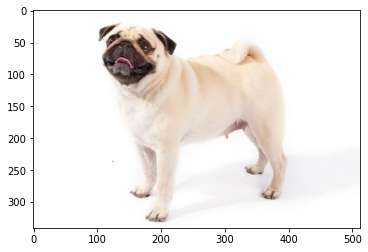

In [15]:
content_path = tf.keras.utils.get_file('panda.jpg', 'https://www.wz.de/imgs/39/7/4/8/1/1/1/2/9/tok_96154e344db702777db1da3d73bb8687/w1900_h1068_x1158_y848_DPA_bfunk_dpa_5FA07A00D83E6906-241b38b0a3e8112a.jpg')
content_path = tf.keras.utils.get_file('bild_chat1.jpg', 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12225358/Pug-On-White-01.jpg')



content_image = load_img(content_path)

imshow(content_image);

In [16]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [17]:
predicted_top_10 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy(), top=10)[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_10]

[('pug', 0.90616393),
 ('bull_mastiff', 0.041933894),
 ('Brabancon_griffon', 0.012999473),
 ('Labrador_retriever', 0.005699548),
 ('muzzle', 0.004205207),
 ('Great_Pyrenees', 0.003482104),
 ('Staffordshire_bullterrier', 0.001566099),
 ('Norwegian_elkhound', 0.0013784353),
 ('bobsled', 0.0011942004),
 ('Saint_Bernard', 0.001141586)]

In [18]:
from googletrans import Translator
translator = Translator()

i=0
translations = translator.translate([(class_name) for (number, class_name, prob) in predicted_top_10], dest='de', src='en')
for translation in translations:
  print(translation.origin.ljust(30), ' -> ', translation.text.ljust(30), '  -> ', "{:.8f}".format(predicted_top_10[i][2]))
  i += 1

pug                             ->  Mops                             ->  0.90616393
bull_mastiff                    ->  bullmastiff                      ->  0.04193389
Brabancon_griffon               ->  Brabancon Griffon                ->  0.01299947
Labrador_retriever              ->  Labrador Retriever               ->  0.00569955
muzzle                          ->  Schnauze                         ->  0.00420521
Great_Pyrenees                  ->  Große Pyrenäen                   ->  0.00348210
Staffordshire_bullterrier       ->  Staffordshirenbullterrieri       ->  0.00156610
Norwegian_elkhound              ->  Norwegian Elkhound               ->  0.00137844
bobsled                         ->  Bob-                             ->  0.00119420
Saint_Bernard                   ->  Heiliger Bernhard                ->  0.00114159


In [14]:
print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     